# Programming Assignment-2

In [33]:
import pathlib
from tqdm import tqdm
import cv2
import imageio.v3 as iio
import os.path
import os
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [2]:
desktop = pathlib.Path("/Users/Assignment-1/Cropped")
files=list(desktop.rglob("*/*"))
four_label=['Walker_hound','Boston_bull','Lhasa','flat-coated_retriever']

In [3]:
os.path.splitext(files[0])
len(files)

704

In [4]:
def hist_grayscale(path):
    img = iio.imread(uri=path, mode="L")
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    return histogram
def Label(path):
    file_path = str(Path(path))
    last_separator_index = file_path.rfind('/')
    second_last_separator_index = file_path.rfind('/', 0, last_separator_index)
    breed_folder = file_path[second_last_separator_index + 1:last_separator_index]
    if breed_folder == 'n02099267-flat-coated_retriever':
        breed_folder=breed_folder.split('-')[1]+'-'+breed_folder.split('-')[2]
    else:
        breed_folder=breed_folder.split('-')[1]
    return breed_folder

    
    
    

In [5]:
label=[]
df = pd.DataFrame(np.NaN,index=range(len(files)),columns=range(0,256))
idx=0
for i in tqdm(files):
    histogram=hist_grayscale(i)
    label.append(Label(i))
    df.loc[idx]=histogram
    idx+=1
    

100%|███████████████████████████████████████| 704/704 [00:00<00:00, 2401.79it/s]


In [6]:
df,len(label)

(       0      1      2      3      4      5      6      7      8      9    \
 0      0.0    0.0    1.0    2.0    1.0    2.0    3.0    2.0    5.0    8.0   
 1      0.0    1.0    0.0    0.0    3.0    1.0    0.0    2.0    2.0    2.0   
 2      0.0    5.0    3.0    3.0    2.0    8.0    7.0    6.0    9.0    8.0   
 3    143.0  207.0   99.0  108.0   92.0  125.0  126.0  112.0  112.0  108.0   
 4     28.0   84.0   81.0   87.0  104.0   95.0  114.0  110.0  123.0  104.0   
 ..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 699  113.0  191.0  179.0  139.0  164.0  193.0  217.0  216.0  192.0  199.0   
 700    0.0    0.0    1.0    2.0    4.0    4.0    3.0    9.0   12.0   11.0   
 701    6.0   31.0   37.0   33.0   41.0   44.0   39.0   55.0   45.0   55.0   
 702   28.0   88.0  132.0  301.0  257.0  173.0  121.0  145.0  109.0   97.0   
 703    0.0    3.0    1.0    1.0    2.0    4.0    0.0    1.0    1.0    5.0   
 
      ...   246   247   248   249   250   251   252   253    2

In [7]:
df.index=label

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns,index=df.index)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
flat-coated_retriever,-0.192241,-0.277115,-0.417167,-0.352665,-0.427785,-0.419972,-0.327488,-0.475314,-0.437232,-0.508569,...,0.140699,0.089953,-0.011683,-0.026191,-0.311423,-0.087080,-0.270907,-0.390156,-0.296262,-0.242138
flat-coated_retriever,-0.192241,-0.268421,-0.434376,-0.382057,-0.397332,-0.434798,-0.357662,-0.475314,-0.478571,-0.610990,...,-0.037720,-0.218396,-0.182329,-0.310956,-0.311423,-0.087080,-0.426851,-0.482234,-0.391712,-0.263234
flat-coated_retriever,-0.192241,-0.233646,-0.382750,-0.337969,-0.412559,-0.331016,-0.287256,-0.421438,-0.382113,-0.508569,...,0.527271,1.246263,1.319349,1.041677,1.364223,0.924196,1.569225,1.198196,0.944579,0.527861
flat-coated_retriever,1.208953,1.522502,1.269297,1.205123,0.957807,1.403626,0.909658,1.006264,1.037197,1.198461,...,-0.037720,0.167041,-0.045812,0.329765,0.325323,-0.087080,0.040979,0.070236,0.538919,0.011012
flat-coated_retriever,0.082119,0.453164,0.959539,0.896504,1.140522,0.958846,0.788961,0.979326,1.188774,1.130179,...,-0.037720,-0.141308,-0.011683,-0.275360,-0.277910,-0.261438,-0.239719,-0.413176,-0.343987,-0.263234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston_bull,0.914996,1.383401,2.646003,1.660702,2.054099,2.411793,1.824944,2.407028,2.139574,2.751857,...,-0.245874,-0.449658,-0.421232,-0.524529,-0.512500,-0.313745,-0.520417,-0.482234,-0.391712,-0.263234
Boston_bull,-0.192241,-0.277115,-0.417167,-0.352665,-0.382106,-0.390320,-0.327488,-0.381032,-0.340774,-0.457358,...,-0.394556,-0.565289,-0.455361,-0.488934,-0.478987,-0.296309,-0.520417,-0.482234,-0.391712,-0.263234
Boston_bull,-0.133450,-0.007607,0.202350,0.102915,0.181266,0.202720,0.034603,0.238537,0.113957,0.293735,...,-0.037720,0.205584,0.022446,-0.026191,0.124245,-0.017337,-0.208530,0.116275,-0.093433,-0.252686
Boston_bull,0.082119,0.487940,1.837189,4.041471,3.470144,2.115273,0.859367,1.450737,0.995858,1.010687,...,-0.454029,-0.565289,-0.523619,-0.524529,-0.512500,-0.313745,-0.520417,-0.482234,-0.391712,-0.263234


In [10]:
from sklearn.model_selection import train_test_split
train=pd.DataFrame()
test=pd.DataFrame()

for i in list(df.index.unique()):
    X_train, X_test, y_train, y_test = train_test_split(df.loc[i],df.loc[i].index , train_size=0.8, random_state=42)
    train=pd.concat([train,X_train])
    test=pd.concat([test,X_test])
train_label=train.index
test_label=test.index
    

In [11]:
train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
flat-coated_retriever,-0.192241,-0.277115,-0.417167,-0.367361,-0.443011,-0.419972,-0.357662,-0.461845,-0.506130,-0.645131,...,-0.216138,-0.102765,-0.011683,0.116191,0.157758,-0.052208,0.009791,0.208353,0.240640,0.021560
flat-coated_retriever,-0.192241,-0.277115,-0.434376,-0.382057,-0.443011,-0.449624,-0.357662,-0.502252,-0.506130,-0.645131,...,-0.454029,-0.565289,-0.523619,-0.524529,-0.512500,-0.296309,-0.520417,-0.459215,-0.379781,-0.263234
flat-coated_retriever,-0.192241,-0.233646,-0.382750,-0.337969,-0.412559,-0.331016,-0.287256,-0.421438,-0.382113,-0.508569,...,0.527271,1.246263,1.319349,1.041677,1.364223,0.924196,1.569225,1.198196,0.944579,0.527861
flat-coated_retriever,0.229097,0.592265,0.288394,0.161699,0.622829,0.662326,0.416811,0.507915,0.472229,0.788774,...,-0.394556,-0.565289,-0.387103,-0.453338,-0.445474,-0.313745,-0.395662,-0.390156,-0.343987,-0.221042
flat-coated_retriever,-0.192241,-0.277115,-0.417167,-0.382057,-0.427785,-0.434798,-0.347604,-0.488783,-0.464791,-0.628061,...,-0.067456,-0.141308,-0.284716,-0.061787,-0.311423,-0.209130,-0.426851,-0.390156,-0.367849,-0.263234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston_bull,-0.192241,-0.277115,-0.417167,-0.382057,-0.443011,-0.449624,-0.357662,-0.502252,-0.506130,-0.645131,...,-0.335083,-0.449658,-0.284716,-0.417743,-0.478987,-0.296309,-0.395662,-0.367136,-0.391712,-0.263234
Boston_bull,1.738076,1.279076,4.883150,3.012744,3.043808,2.085621,1.000181,1.329517,0.926960,0.891195,...,-0.335083,-0.411114,-0.352974,-0.417743,-0.445474,-0.139387,-0.364473,-0.298078,-0.367849,-0.263234
Boston_bull,-0.113853,-0.216258,-0.262288,-0.073439,-0.168938,0.721630,1.533260,1.922148,1.574606,0.874125,...,-0.394556,-0.565289,-0.489490,-0.524529,-0.512500,-0.313745,-0.520417,-0.482234,-0.391712,-0.263234
Boston_bull,-0.182443,-0.172789,-0.227870,-0.337969,-0.229843,-0.331016,-0.247023,-0.327156,-0.258096,-0.389077,...,-0.186401,-0.064221,-0.182329,-0.168573,0.023707,-0.104516,-0.270907,-0.044862,-0.069570,-0.221042


In [12]:
from collections import Counter
value_counts = Counter(train_label)
for i,j in value_counts.items():
    print(i,j)

flat-coated_retriever 127
Walker_hound 129
Lhasa 152
Boston_bull 153


In [13]:
value_counts = Counter(test_label)
for i,j in value_counts.items():
    print(i,j)

flat-coated_retriever 32
Walker_hound 33
Lhasa 39
Boston_bull 39


In [14]:
train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
flat-coated_retriever,-0.192241,-0.277115,-0.417167,-0.367361,-0.443011,-0.419972,-0.357662,-0.461845,-0.506130,-0.645131,...,-0.216138,-0.102765,-0.011683,0.116191,0.157758,-0.052208,0.009791,0.208353,0.240640,0.021560
flat-coated_retriever,-0.192241,-0.277115,-0.434376,-0.382057,-0.443011,-0.449624,-0.357662,-0.502252,-0.506130,-0.645131,...,-0.454029,-0.565289,-0.523619,-0.524529,-0.512500,-0.296309,-0.520417,-0.459215,-0.379781,-0.263234
flat-coated_retriever,-0.192241,-0.233646,-0.382750,-0.337969,-0.412559,-0.331016,-0.287256,-0.421438,-0.382113,-0.508569,...,0.527271,1.246263,1.319349,1.041677,1.364223,0.924196,1.569225,1.198196,0.944579,0.527861
flat-coated_retriever,0.229097,0.592265,0.288394,0.161699,0.622829,0.662326,0.416811,0.507915,0.472229,0.788774,...,-0.394556,-0.565289,-0.387103,-0.453338,-0.445474,-0.313745,-0.395662,-0.390156,-0.343987,-0.221042
flat-coated_retriever,-0.192241,-0.277115,-0.417167,-0.382057,-0.427785,-0.434798,-0.347604,-0.488783,-0.464791,-0.628061,...,-0.067456,-0.141308,-0.284716,-0.061787,-0.311423,-0.209130,-0.426851,-0.390156,-0.367849,-0.263234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston_bull,-0.192241,-0.277115,-0.417167,-0.382057,-0.443011,-0.449624,-0.357662,-0.502252,-0.506130,-0.645131,...,-0.335083,-0.449658,-0.284716,-0.417743,-0.478987,-0.296309,-0.395662,-0.367136,-0.391712,-0.263234
Boston_bull,1.738076,1.279076,4.883150,3.012744,3.043808,2.085621,1.000181,1.329517,0.926960,0.891195,...,-0.335083,-0.411114,-0.352974,-0.417743,-0.445474,-0.139387,-0.364473,-0.298078,-0.367849,-0.263234
Boston_bull,-0.113853,-0.216258,-0.262288,-0.073439,-0.168938,0.721630,1.533260,1.922148,1.574606,0.874125,...,-0.394556,-0.565289,-0.489490,-0.524529,-0.512500,-0.313745,-0.520417,-0.482234,-0.391712,-0.263234
Boston_bull,-0.182443,-0.172789,-0.227870,-0.337969,-0.229843,-0.331016,-0.247023,-0.327156,-0.258096,-0.389077,...,-0.186401,-0.064221,-0.182329,-0.168573,0.023707,-0.104516,-0.270907,-0.044862,-0.069570,-0.221042


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_values=[1,3,5,7,10,20]
trai,val=[],[]
kf = KFold(5)
for _,j in enumerate(k_values):
    train_err,val_err=[],[]
    for train_index, test_index in kf.split(train):
        x_train=train.iloc[train_index]
        x_test=train.iloc[test_index]
        lab_train=[train_label[i] for i in train_index]
        lab_test=[train_label[i] for i in test_index]
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(x_train,lab_train)
        x_tra_pred = neigh.predict(x_train)
        x_tra_err=1-accuracy_score(lab_train, x_tra_pred)
        x_val_pred = neigh.predict(x_test)
        x_val_err=1-accuracy_score(lab_test, x_val_pred)
        train_err.append(x_tra_err)
        val_err.append(x_val_err)
    trai.append(np.mean(train_err))
    val.append(np.mean(val_err))
print(trai)
print(val)
    
         
         
         
         

        
    
    


[0.0, 0.2905534123448934, 0.3293290645879733, 0.3547257795100223, 0.38412842029907723, 0.4010658606426981]
[0.7608881163084703, 0.7554203539823009, 0.7911030341340076, 0.7910714285714285, 0.7964285714285714, 0.8017857142857142]


In [16]:
from sklearn.model_selection import StratifiedKFold
k_values=[1,3,5,7,10,20]
trai_st,val_st=[],[]
skf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for _,j in enumerate(k_values):
    train_err,val_err=[],[]
    for train_index, test_index in skf.split(train,train.index):
        x_train=train.iloc[train_index]
        x_test=train.iloc[test_index]
        lab_train=[train_label[i] for i in train_index]
        lab_test=[train_label[i] for i in test_index]
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(x_train,lab_train)
        x_tra_pred = neigh.predict(x_train)
        x_tra_err=1-accuracy_score(lab_train, x_tra_pred)
        x_val_pred = neigh.predict(x_test)
        x_val_err=1-accuracy_score(lab_test, x_val_pred)
        train_err.append(x_tra_err)
        val_err.append(x_val_err)
    trai_st.append(sum(train_err)/len(train_err))
    val_st.append(sum(val_err)/len(val_err))
print(trai_st)
print(val_st)

[0.0, 0.3088261613108495, 0.3649727569201399, 0.38949053452115806, 0.4188901924912504, 0.4491916560610882]
[0.5579646017699115, 0.5506479140328697, 0.5275758533501896, 0.5472187104930468, 0.511599241466498, 0.5329646017699115]


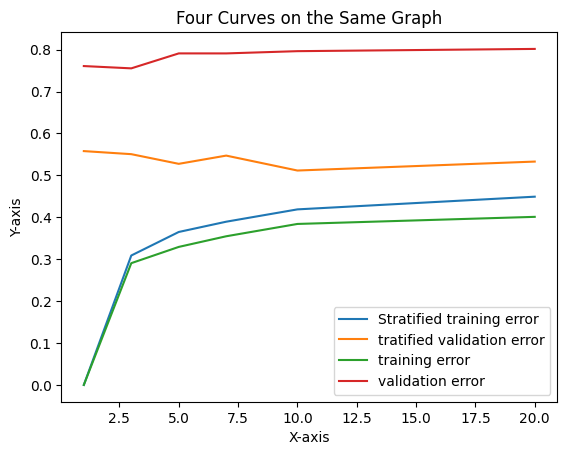

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot([1,3,5,7,10,20], trai_st, label='Stratified training error')
ax.plot([1,3,5,7,10,20], val_st, label='tratified validation error')
ax.plot([1,3,5,7,10,20], trai, label='training error')
ax.plot([1,3,5,7,10,20], val, label='validation error')
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Four Curves on the Same Graph')
plt.show()

#### For Stratified training error and validation error curves lowest error mean is for k=1 and k=20
#### For Standard training error and validation error curves lowest error mean is for k=1 and k=3

### Model Complexity
The performance measurements (probably accuracy) go down as k grows.A smaller k produces a more sophisticated model that can capture complex patterns in the training data; this is a common tendency in KNN.
On the other hand, the model gets simpler as k grows, which could result in underfitting.

As k increases from 1 to 20, both training and validation errors increase.This behavior suggests that a smaller k (e.g.k=1) results in a more complex model, leading to potentially overfitting.Conversely, a larger k(e.g.k=20) results in a simpler model, potentially leading to underfitting.

### For K-value=20, the stratified validation error is low 

In [18]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(train,train_label)
x_test_pred = neigh.predict(test)
x_test_err=1-accuracy_score(test_label, x_test_pred)
x_test_err

0.5734265734265734

Test error=0.57342

cross valdation scores of adaboost [0.49557522 0.4375     0.50892857 0.49107143 0.5       ]
mean of cross valdation scores of adaboost 0.48661504424778756
accuracy of adboost classifier for test data 0.43356643356643354
[[14.8  2.2  6.2  7.4]
 [ 3.  16.6  7.6  3.2]
 [ 4.2  7.  13.   1.6]
 [ 8.8  3.6  2.8 10.2]]
f_score of AdaBoost classifier 0.4340686349240518


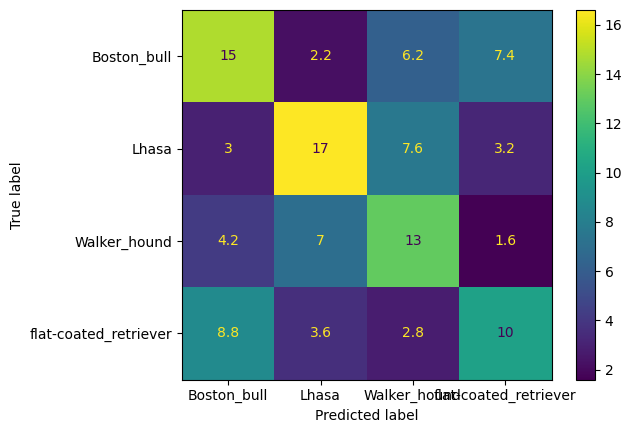

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
clf_adboo = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adboo.fit(train,train_label)
scores_adboo = cross_val_score(clf_adboo, train,train_label,
cv=skf)
print("cross valdation scores of adaboost",scores_adboo)
print("mean of cross valdation scores of adaboost",np.mean(scores_adboo))
y_test_pre=clf_adboo.predict(test)
accuracy_adboos=accuracy_score(test_label,y_test_pre)
print("accuracy of adboost classifier for test data",accuracy_adboos)
# ConfusionMatrixDisplay.from_estimator(clf_adboo,test ,test_label)
y_pred = cross_val_predict(clf_adboo, train, train_label, cv=skf)
conf_mat = confusion_matrix(train_label, y_pred)
print(conf_mat/5)
ConfusionMatrixDisplay(confusion_matrix=(conf_mat/5).astype(float),display_labels=clf_adboo.classes_).plot()
print("f_score of AdaBoost classifier",f1_score(test_label,y_test_pre, average='weighted'))

Cross Validation scores [0.38053097 0.33035714 0.33928571 0.39285714 0.375     ]
mean of Cross Validation scores 0.36360619469026545
accuracy of SVM classifier for test data 0.35664335664335667
f_score of SVM 0.35346539100358393
[[13.4  4.   5.2  8. ]
 [ 6.2 11.6  8.6  4. ]
 [ 6.8  8.8  8.2  2. ]
 [ 9.6  5.6  2.6  7.6]]


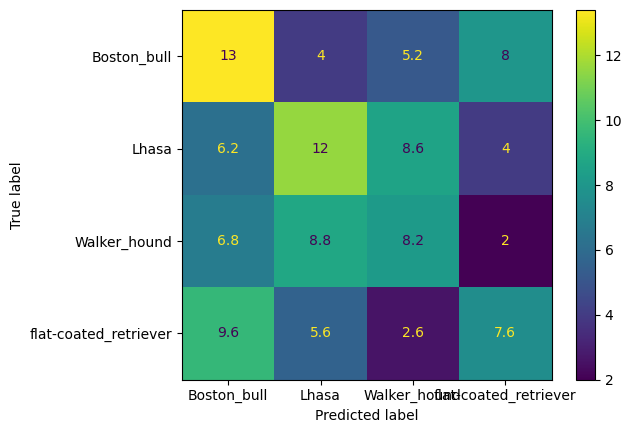

In [27]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train,train_label)
scores_svm = cross_val_score(clf_svm, train,train_label,
cv=skf)
print("Cross Validation scores",scores_svm)
print("mean of Cross Validation scores",np.mean(scores_svm))
y_test=clf_svm.predict(test)
accuracy_svm=accuracy_score(test_label,y_test)
print("accuracy of SVM classifier for test data",accuracy_svm)
# ConfusionMatrixDisplay.from_estimator(clf_svm,test ,test_label)
print("f_score of SVM",f1_score(test_label,y_test, average="weighted"))
y_pred = cross_val_predict(clf_svm, train, train_label, cv=skf)
conf_mat = confusion_matrix(train_label, y_pred)
print(conf_mat/5)
ConfusionMatrixDisplay(confusion_matrix=(conf_mat/5).astype(float),display_labels=clf_svm.classes_).plot()

Cross Validation scores [0.39823009 0.45535714 0.4375     0.38392857 0.49107143]
mean of Cross Validation scores 0.4332174462705436
accuracy of MLP classifier for test data 0.35664335664335667
[[13.6  4.4  4.2  8.4]
 [ 4.4 15.2  7.2  3.6]
 [ 4.6  9.   8.8  3.4]
 [ 9.8  3.4  3.   9.2]]
f_score of MLP 0.4709611287803541


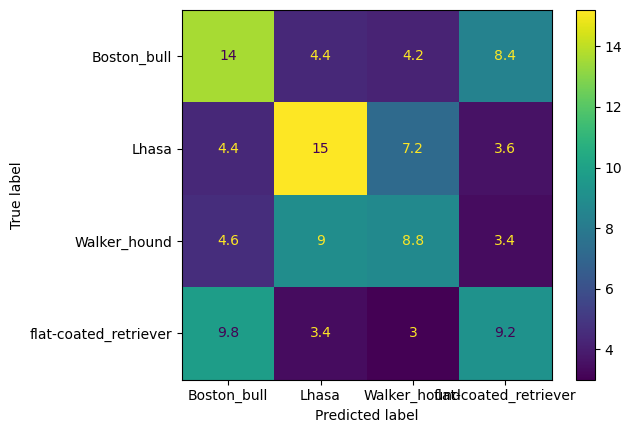

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(train,train_label)
scores_mlp = cross_val_score(mlp, train,train_label,
cv=skf)
print("Cross Validation scores",scores_mlp)
print("mean of Cross Validation scores",np.mean(scores_mlp))
y_test=mlp.predict(test)
accuracy_mlp=accuracy_score(test_label,y_test)
print("accuracy of MLP classifier for test data",accuracy_svm)
# ConfusionMatrixDisplay.from_estimator(mlp,test ,test_label)
y_pred = cross_val_predict(mlp, train, train_label, cv=skf)
conf_mat = confusion_matrix(train_label, y_pred)
print(conf_mat/5)
print("f_score of MLP",f1_score(test_label,y_test, average="weighted"))
ConfusionMatrixDisplay(confusion_matrix=(conf_mat/5).astype(float),display_labels=mlp.classes_).plot()

### Based on confusion matrix, the performance of adaboost and MLP classifier are almost similar and better than SVM as number true predicted values are more compared with SVM
### Based on mean validation accuracies Adaboost performs better than other two
### Based on accuracies,Adaboost performs better than other two
###  Based on F-1 score,Adaboost performs better than other two

## References
### https://machinelearningmastery.com/k-fold-cross-validation/
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
### https://scikit-learn.org/stable/modules/svm.html#svm-kernels
### https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html
### https://stats.stackexchange.com/questions/550991/why-does-error-rate-of-knn-increase-when-k-approaches-size-of-training-set

In [ ]:
pip install --upgrade --user nbconvert